In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read("/Users/athib/Desktop/CovidRSV/scRNA2/HarmonyCorrected.h5ad")

In [7]:
sc.set_figure_params(dpi=100, color_map = 'viridis')
sc.settings.verbosity = 3

In [4]:
MGK = adata[adata.obs['leiden'].isin(['19'])].copy()
sc.pp.neighbors(MGK, use_rep="X_pca_harmony")
sc.tl.umap(MGK)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [5]:
sc.tl.leiden(MGK)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


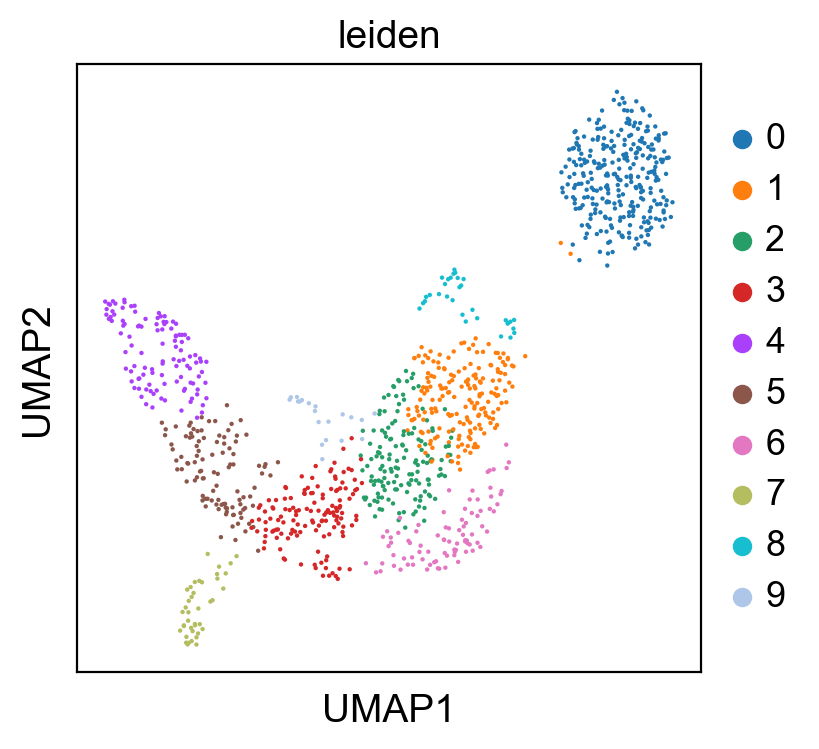

In [8]:
sc.pl.umap(MGK, color=['leiden'], size=10, add_outline=False)


In [9]:
markerdict = dict()

markerdict["T"] = ["CD3E","CD3D", "CD3G"]
markerdict["Naive T"] = ["LEF1","IL7R"]
markerdict["CD4"] = ["CD4"]
markerdict["CD8"] = ["CD8A", "CD8B"]
markerdict["TREG"] = ["FOXP3"]
markerdict["γδ T"] = ["TRDC","TRGC2"]
markerdict["MAIT"] = ["KLRB1"]
markerdict["NK"] = ["NKG7", "NCAM1"]
markerdict["B"] = ["MS4A1", "CD79A"]
markerdict["PCs"] = ["JCHAIN", "MZB1", "TNFRSF17"]
markerdict["pDCs"] = ["IRF7", "TCF4"]
markerdict["Myeloid"] = ["LYZ"]
markerdict["CD14"] = ["CD14"]
markerdict["CD16"] = ["FCGR3A"]
markerdict["DC"] = ["CD1C", "CST3", "FCER1G"]
markerdict["MGK"] = ["PPBP","PF4"]
markerdict["RBC"] = ["HBB"]
markerdict["HSC"] = ["CD34"]
markerdict["Eryth"] = ["ALAS2"]
markerdict["Prolif"] = ["MKI67"]
markerdict["HSC"] = ["CD34"]
markerdict["ISG"] = ["IFI44L", "ISG15", "IFI6", "IFI27", "IFI44"]


In [10]:
sc.tl.dendrogram(MGK, groupby='leiden')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


categories: 0, 1, 2, etc.
var_group_labels: T, Naive T, CD4, etc.


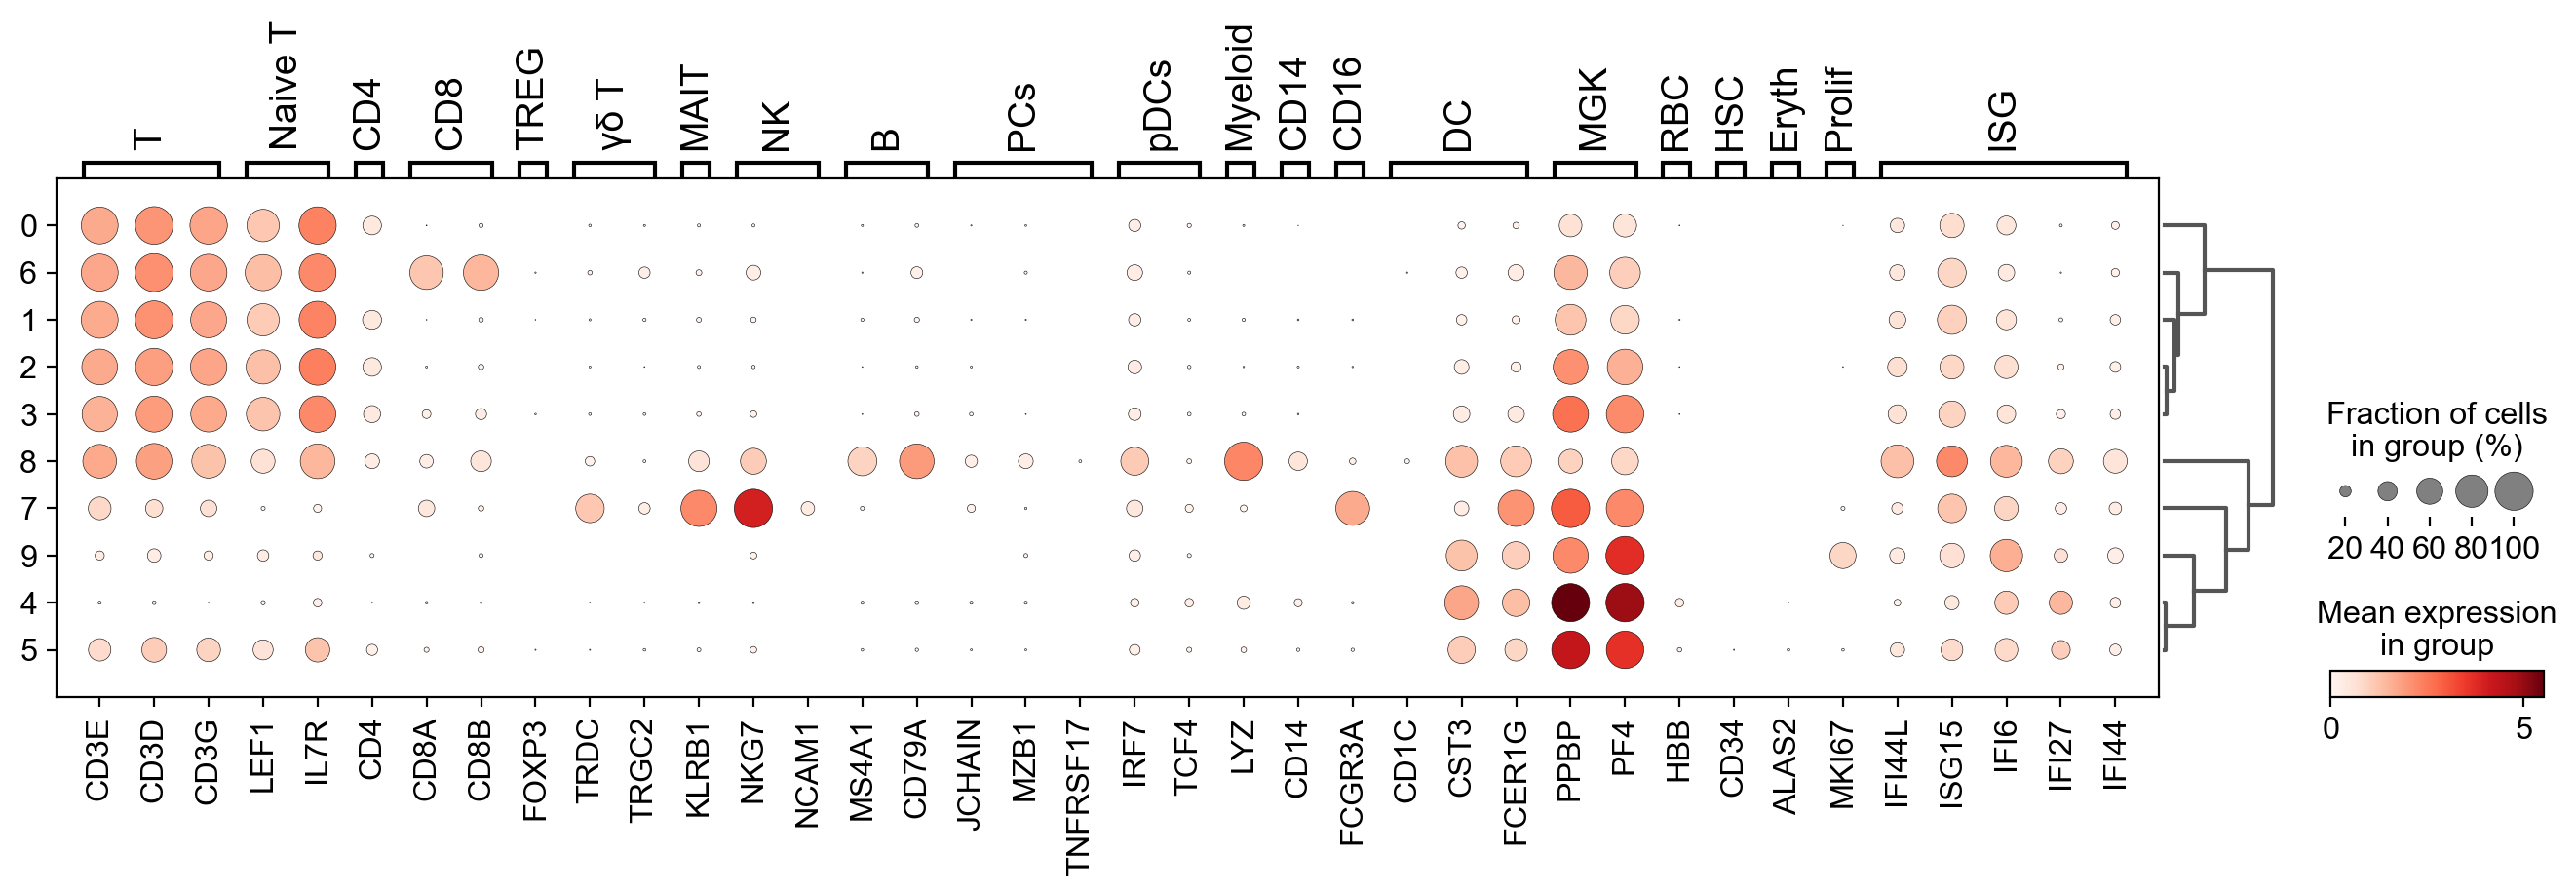

In [11]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.dotplot(MGK, markerdict,  
                  groupby='leiden', dendrogram=True);

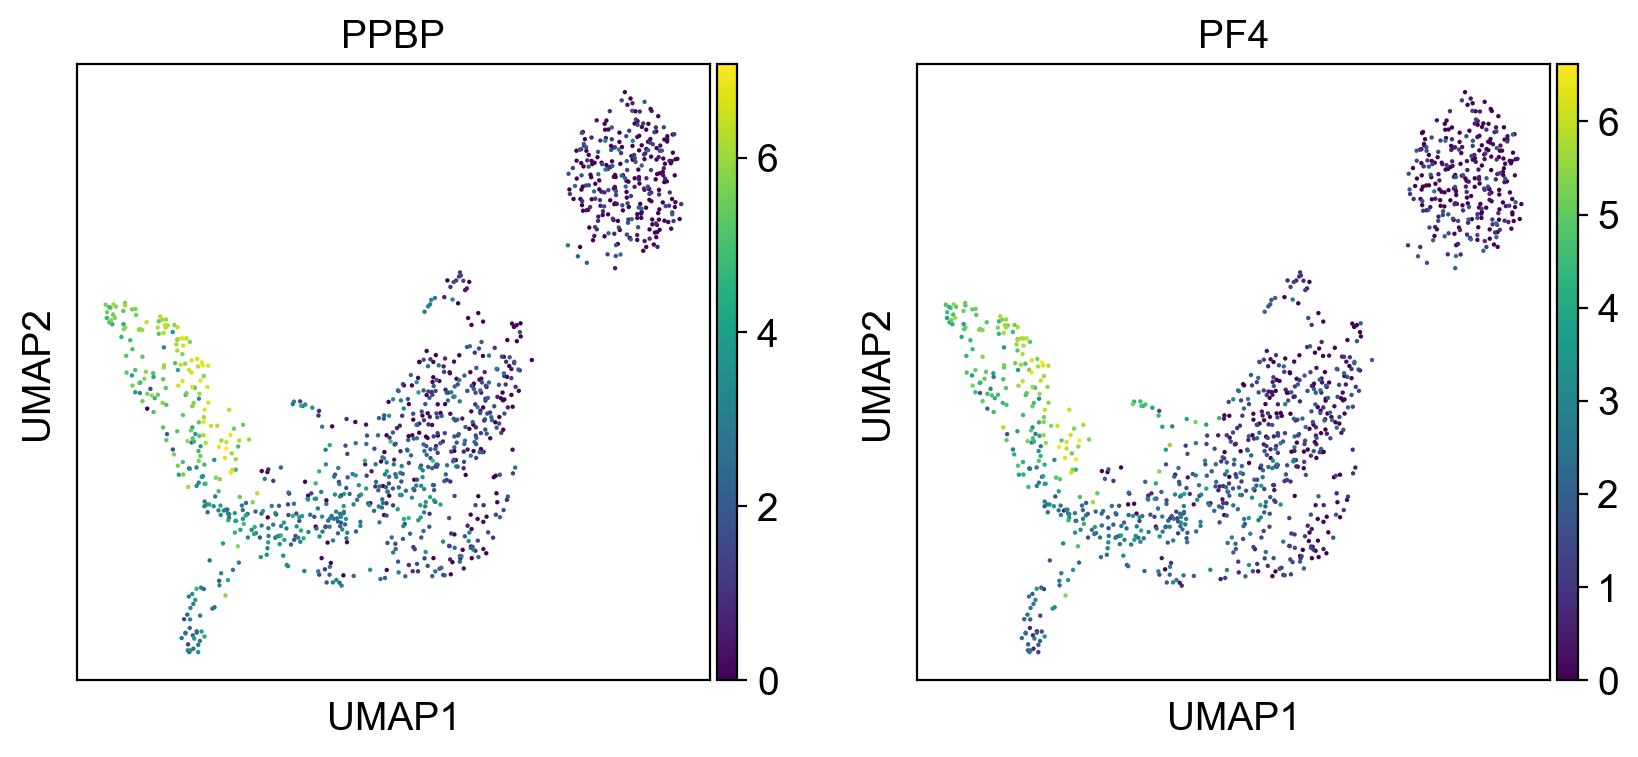

In [12]:
sc.pl.umap(MGK, color=['PPBP', 'PF4'], size=10, add_outline=False)


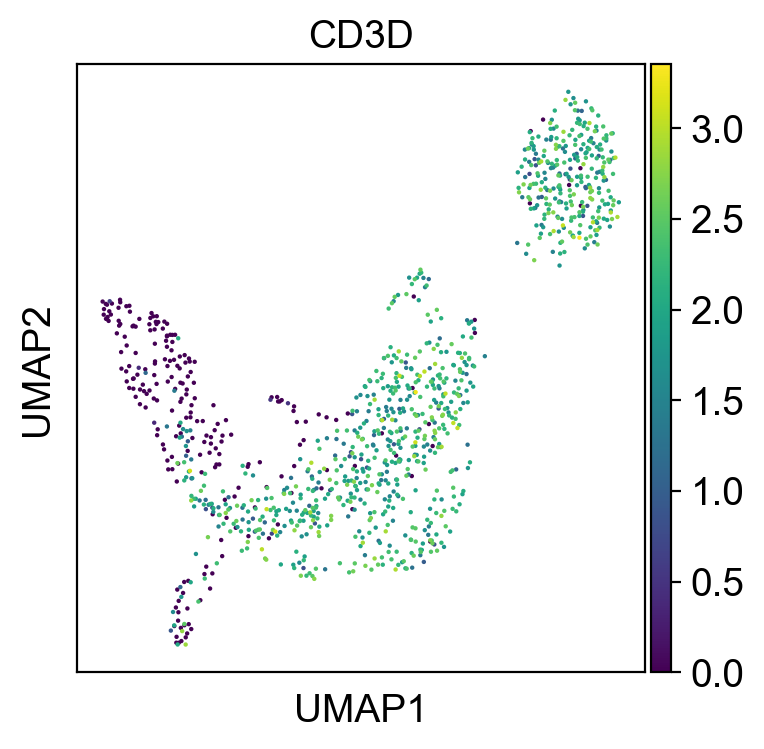

In [13]:
sc.pl.umap(MGK, color=['CD3D'], size=10, add_outline=False)


In [14]:
sum(MGK.obs['leiden'] == '4') 

111

In [15]:
sum(MGK.obs['leiden'] == '5') 

104

# Subcluster 4 and 5 to separate out T cell doublets 

In [16]:
MGK2 = MGK[MGK.obs['leiden'].isin(['4','5'])].copy()
sc.pp.neighbors(MGK2, use_rep="X_pca_harmony")
sc.tl.umap(MGK2)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [17]:
sc.tl.leiden(MGK2, resolution=0.5)

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


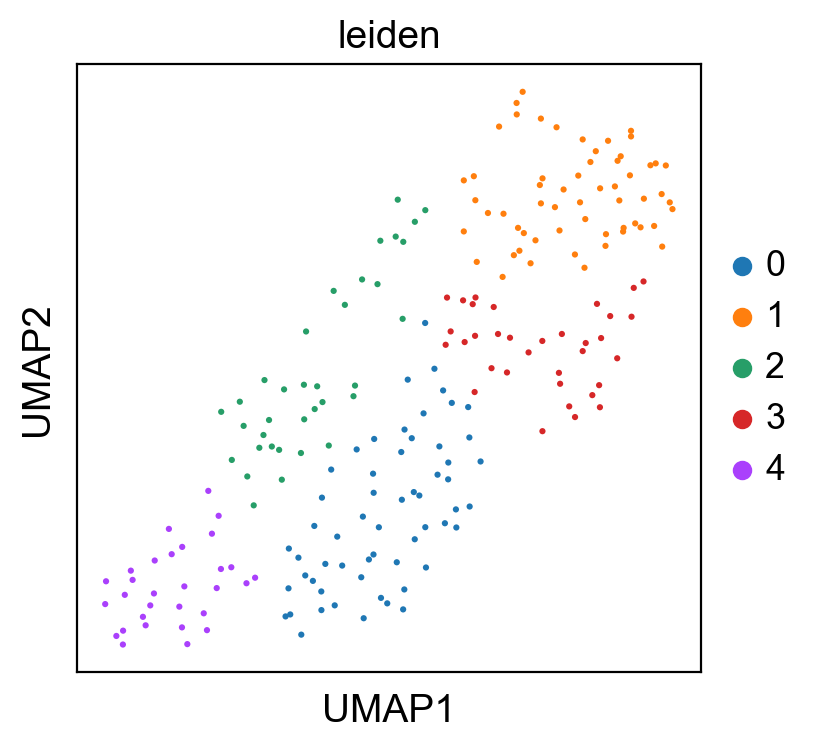

In [18]:
sc.pl.umap(MGK2, color=['leiden'], size=20, add_outline=False)


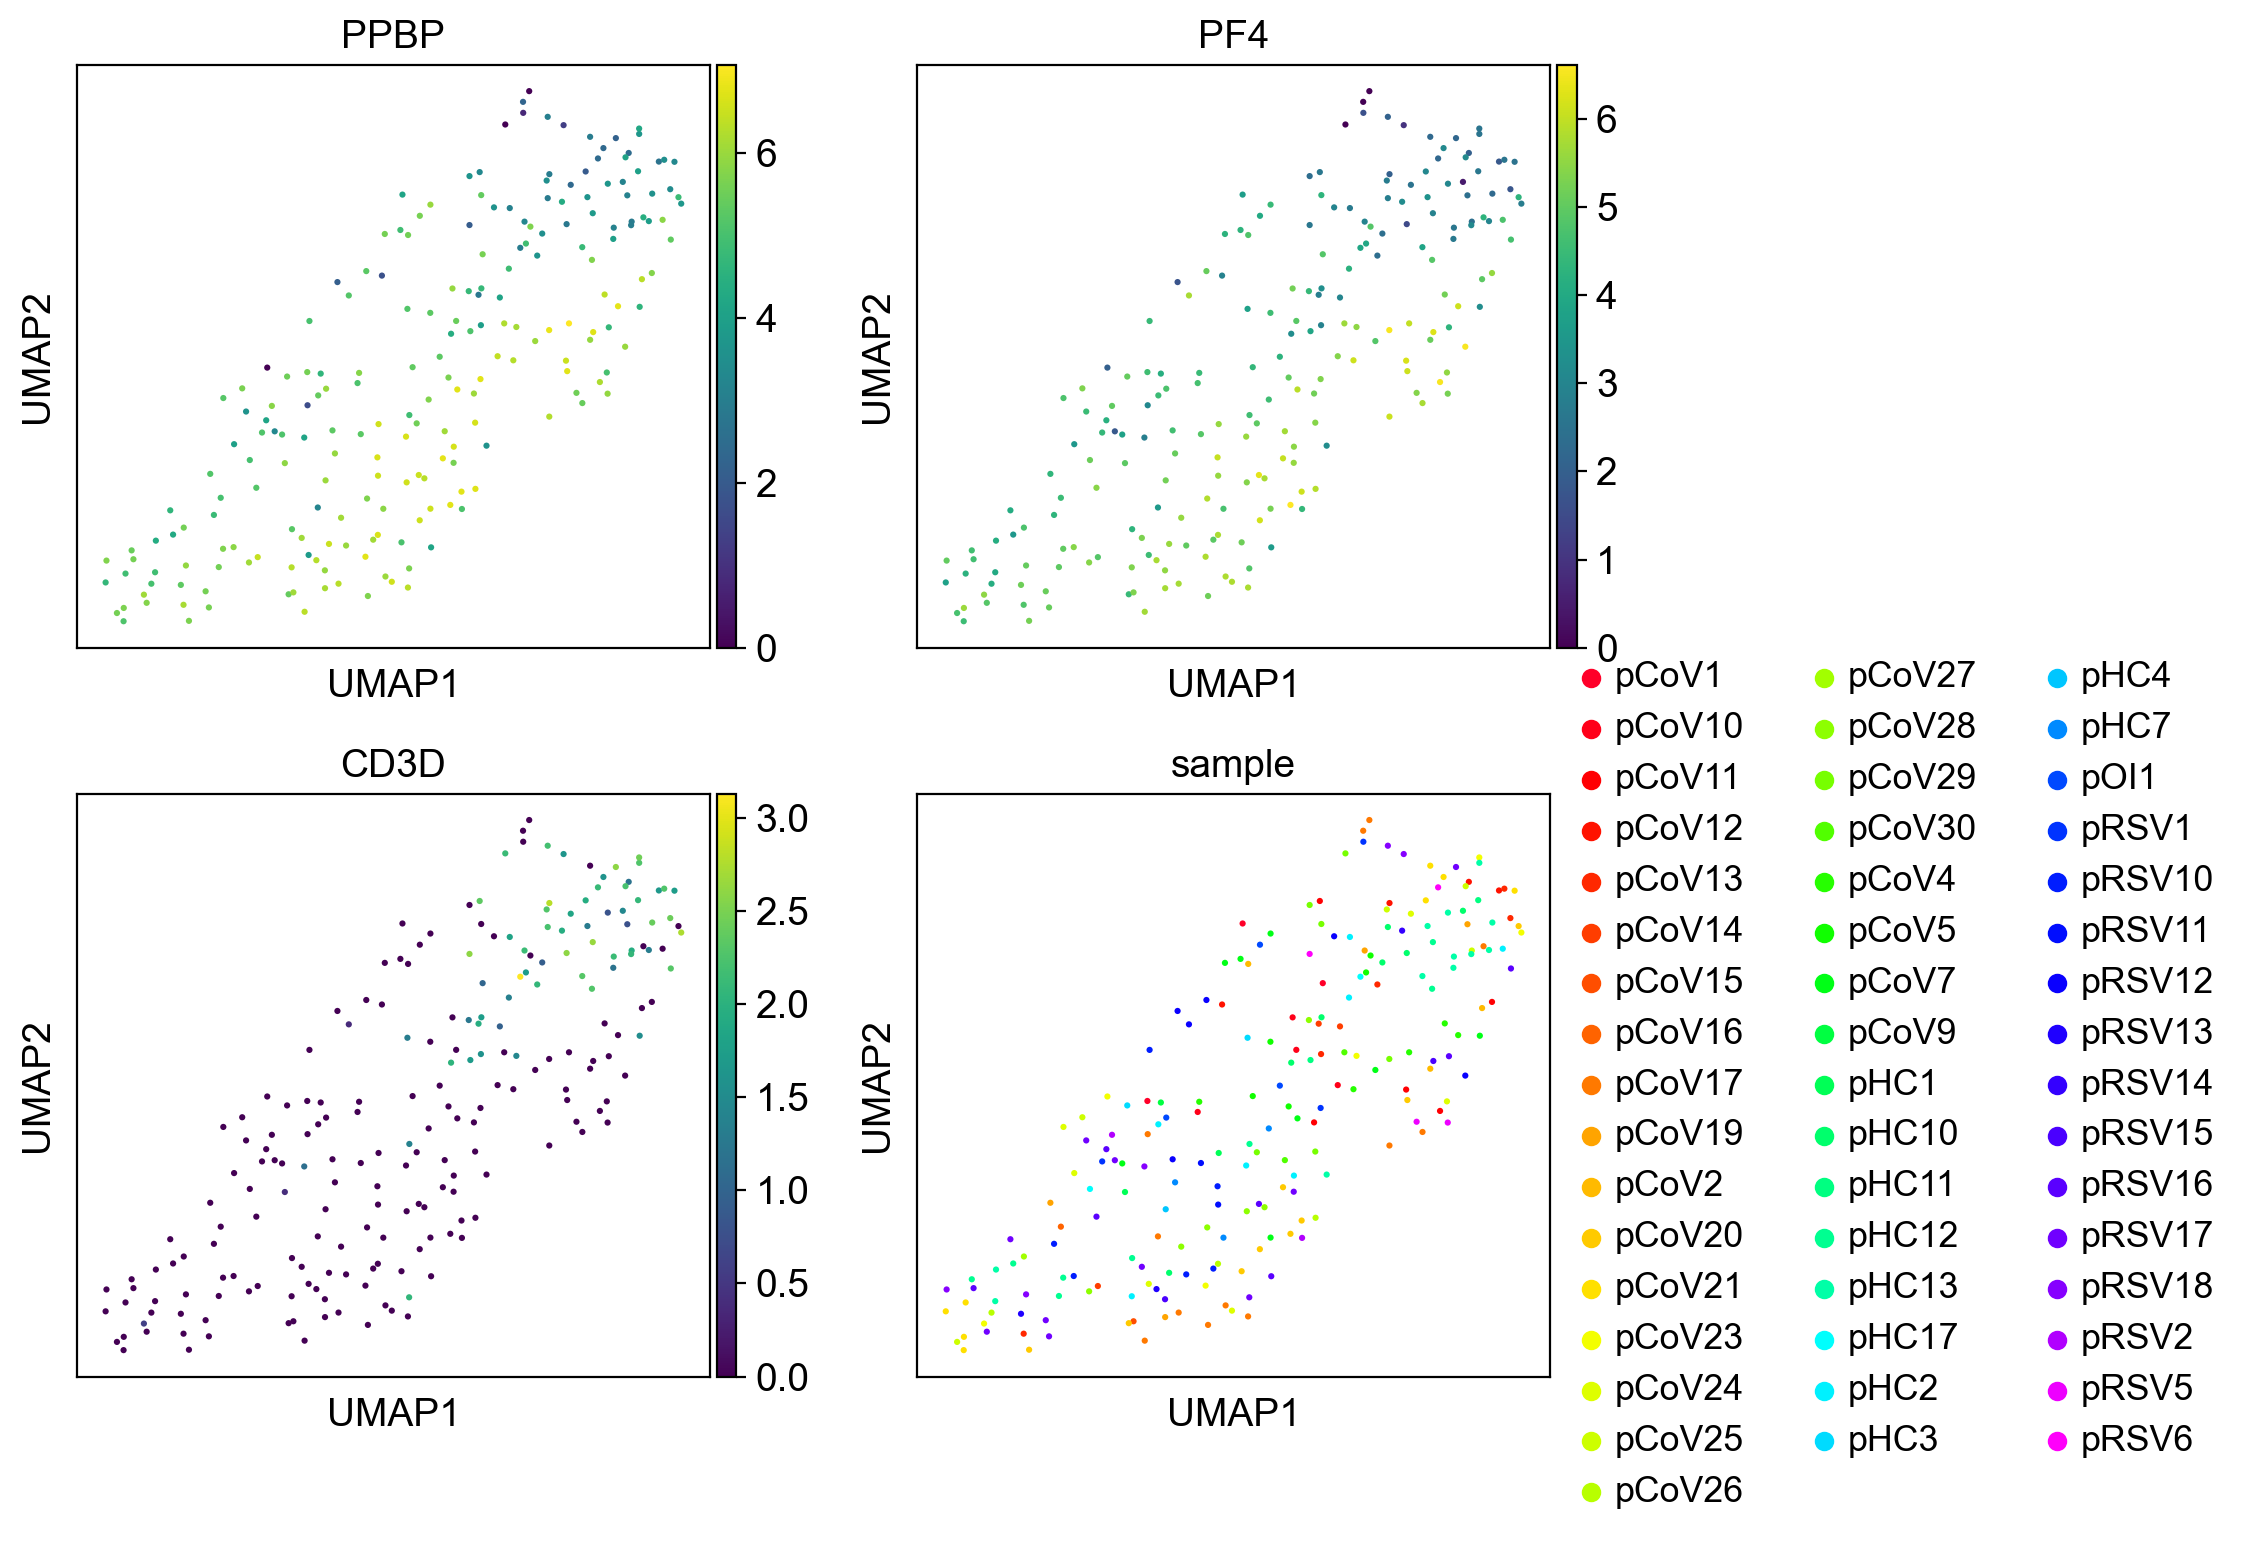

In [19]:
sc.pl.umap(MGK2, color=['PPBP', 'PF4', 'CD3D', 'sample'], ncols=2, size=20, add_outline=False)


In [20]:
sc.tl.dendrogram(MGK2, groupby='leiden')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


categories: 0, 1, 2, etc.
var_group_labels: T, Naive T, CD4, etc.


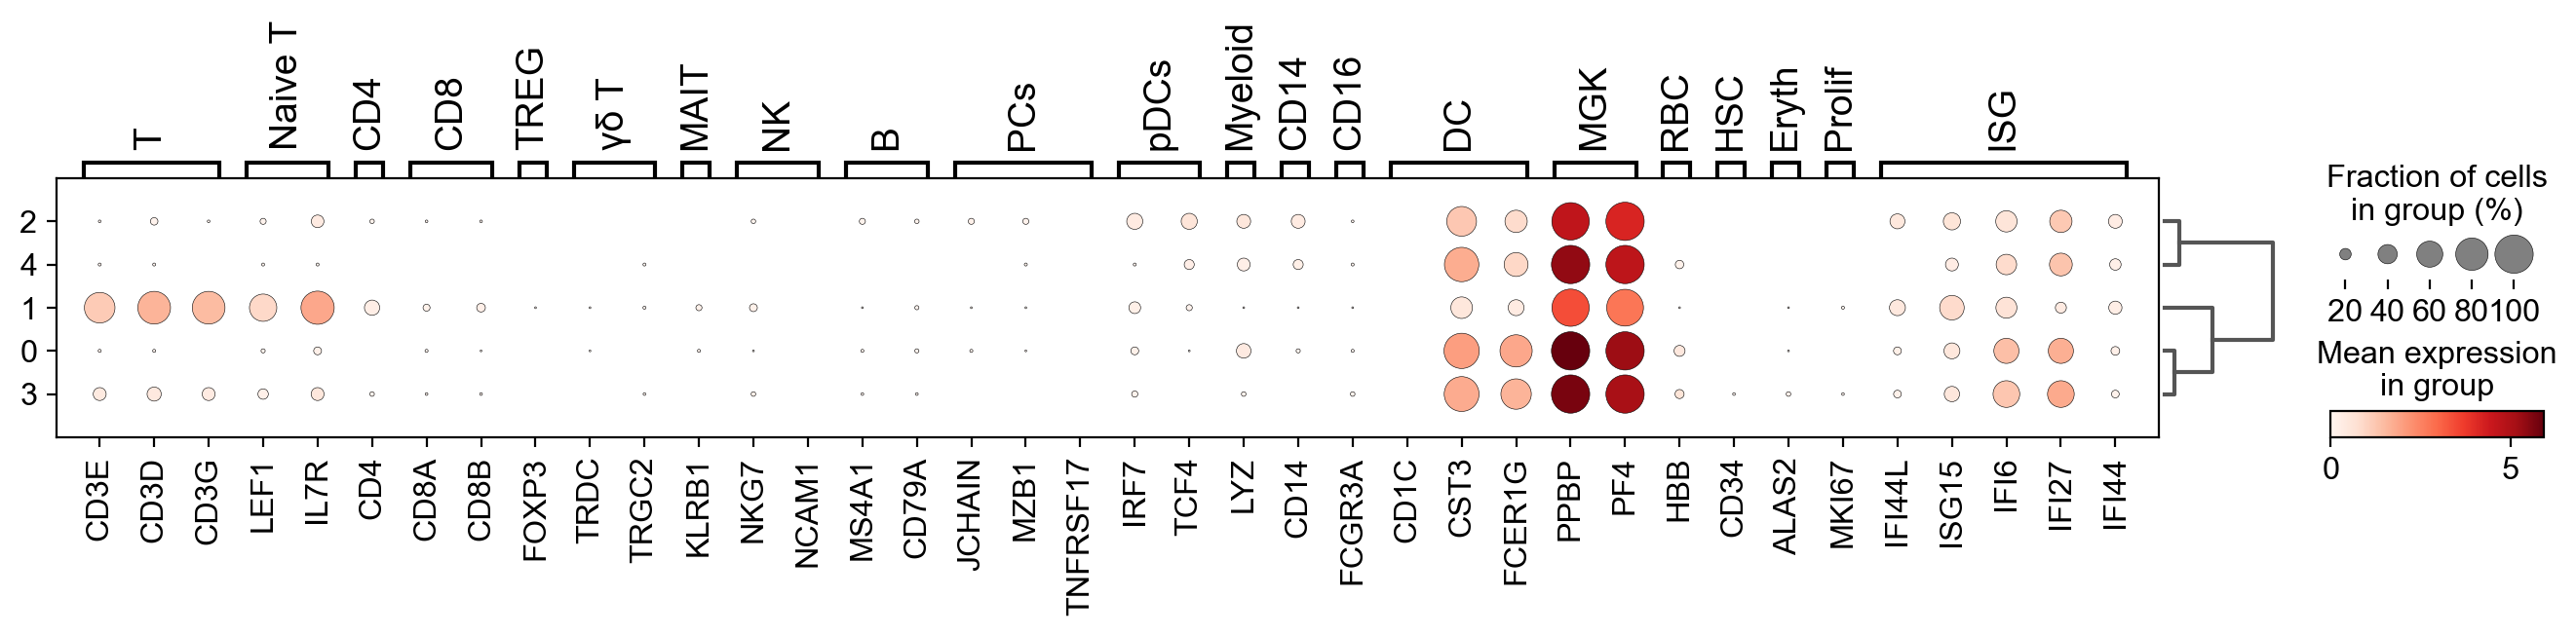

In [21]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.dotplot(MGK2, markerdict,  
                  groupby='leiden', dendrogram=True);

In [22]:
sum(MGK2.obs['leiden'].isin(["2",'4','0','3']))

157

In [23]:
sum(MGK2.obs['leiden'].isin(["1"]))

58

# Summary
Select all cells in clusters 0,2,3,4 as MGK

In [24]:
barcodes = MGK2.obs.index
barcodes = barcodes[MGK2.obs['leiden'].isin(["2",'4','0','3'])]
#pd.DataFrame(barcodes).to_csv("MGK_Barcodes.txt", header=None, index=None)